# Problem Set 2: Linear Discriminant Functions and Support Vector Machines

## Problem 1:
### Train a multi class SVM model on MNIST dataset and report the performance

In [1]:
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings("ignore")

#### Import the MNIST dataset

In [2]:
from tensorflow.keras.datasets import mnist

#### Divide the data into training and test sets

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train = x_train.reshape(x_train.shape[0], 784,)
x_test = x_test.reshape(x_test.shape[0], 784,)

#### Build the SVM model with hyperparameter values as, C=default, gamma=0.1

In [5]:
from sklearn.svm import SVC
print('SVM Classifier with gamma = 0.1; Kernel = Polynomial')
classifier = SVC(gamma=0.1, kernel='poly', random_state = 0)
classifier.fit(x_train,y_train)

SVM Classifier with gamma = 0.1; Kernel = Polynomial


SVC(gamma=0.1, kernel='poly', random_state=0)

In [6]:
y_pred = classifier.predict(x_test)

#### Evaluating the performance of the SVM model with polynomial kernel

In [7]:
from sklearn.metrics import accuracy_score,confusion_matrix
model_acc = classifier.score(x_test, y_test)
test_acc = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test,y_pred)

In [8]:
print('\nSVM Trained Classifier Accuracy: ', model_acc)
print('\nPredicted Values: ',y_pred)
print('\nAccuracy of Classifier on Validation Images: ',test_acc)
print('\nConfusion Matrix: \n',conf_mat)


SVM Trained Classifier Accuracy:  0.9787

Predicted Values:  [7 2 1 ... 4 5 6]

Accuracy of Classifier on Validation Images:  0.9787

Confusion Matrix: 
 [[ 972    0    1    1    0    3    1    0    2    0]
 [   0 1126    2    1    1    0    3    0    2    0]
 [   8    0 1006    0    2    0    5    8    3    0]
 [   0    2    1  987    0    6    0    5    6    3]
 [   2    0    2    0  965    0    3    1    0    9]
 [   2    0    0   10    1  867    3    1    5    3]
 [   4    5    1    0    3    6  937    0    2    0]
 [   0   10    9    2    1    0    0 1000    0    6]
 [   5    0    1    3    4    4    1    4  950    2]
 [   3    6    1    5    9    3    1    1    3  977]]


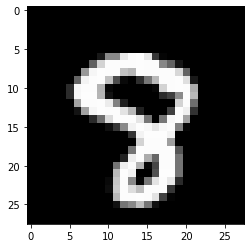

In [20]:
test=random.randint(0,10000)
test_char=x_test[test].reshape(28,28)
plt.imshow(test_char,cmap='gray')

In [21]:
test_pred=y_pred[test]
print('Actual:',y_test[test])
print('Predicted:',test_pred)

Actual: 8
Predicted: 8


#### Using the polynomial kernel gives competiitive performance giving an accuracy of 97.87%

#### Tuning parameters using cross validation for hyperparameters gamma and C

In [ ]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]


# specify model
model = SVC(kernel="poly")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(x_train, y_train)